In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import glob
import os
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
from dataset import RatingsPTDataset

### Plot Loss

In [3]:
def load_checkpoint_loss(filename):
    checkpoint = torch.load(filename)
    start_epoch = checkpoint.get("epoch", 0)
    loss = checkpoint["loss"]
    return start_epoch, loss

def plot_losses(folder_path, pattern="*.pth"):
    model_name = os.path.basename(os.path.normpath(folder_path))
    # 1. Collect all checkpoint file paths
    files = sorted(glob.glob(f"{folder_path}/{pattern}"))

    if not files:
        print(f"No files found in {folder_path} with pattern {pattern}")
        return

    # 2. Load epochs and losses
    epochs, losses = [], []
    for f in files:
        try:
            epoch, loss = load_checkpoint_loss(f)
            epochs.append(epoch)
            losses.append(loss)
        except Exception as e:
            print(f"Skipping {f}: {e}")

    # 3. Sort by epoch (in case filenames aren't ordered)
    epochs, losses = zip(*sorted(zip(epochs, losses)))

    # 4. Plot
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, losses, marker='o')
    plt.title(f"Training Loss - {model_name.title()}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

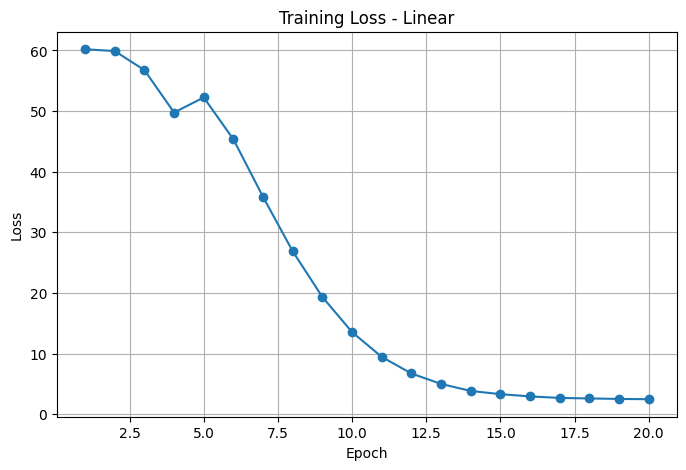

In [4]:
plot_losses("checkpoints/linear")

Jump in loss is because I switched data sources and the data was messed up

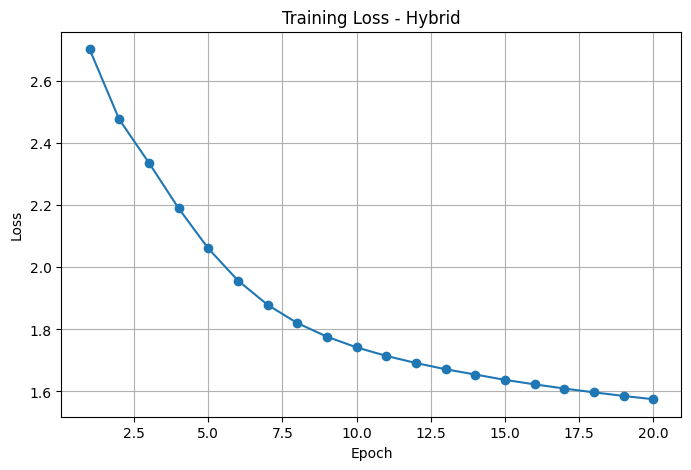

In [5]:
plot_losses("checkpoints/hybrid")

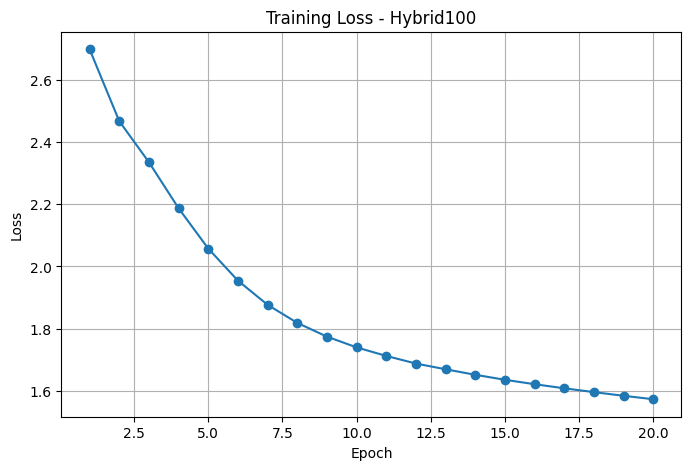

In [6]:
plot_losses("checkpoints/hybrid100")

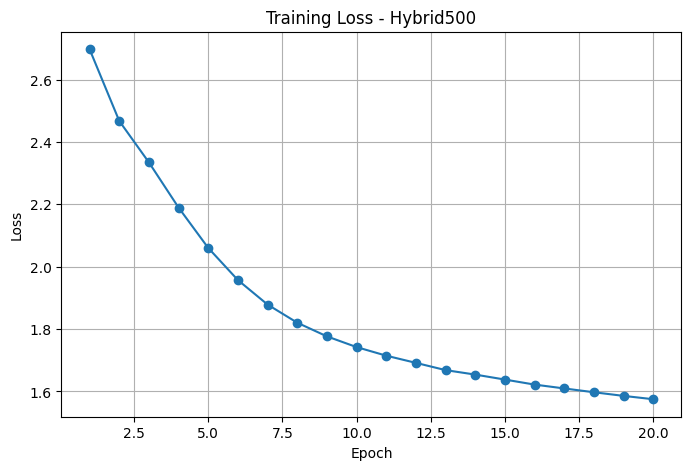

In [7]:
plot_losses("checkpoints/hybrid500")

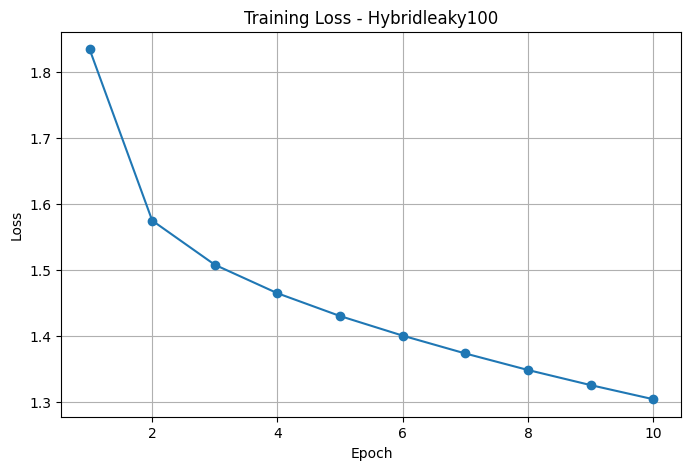

In [8]:
plot_losses("checkpoints/hybridLeaky100")

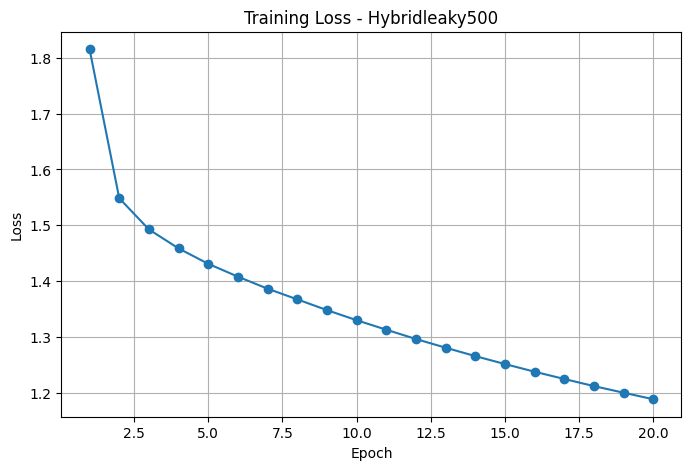

In [9]:
plot_losses("checkpoints/hybridLeaky500")
